## 霍夫变换（Hough Transform）／直线检测
-----

[参考](https://blog.csdn.net/u014485485/article/details/78608967)

-----

### 第一步：霍夫变换

霍夫变换，是将座标**由直角座标系变换到极座标系**，然后再根据数学表达式检测某些形状（如直线和圆）的方法。*当直线上的点变换到极座标中的时候，会交于一定的r,t的点*。这个点即为要检测的直线的参数。通过对这个参数进行逆变换，我们就可以求出直线方程。


其步骤如下：

1. 边缘图像来对边缘像素进行霍夫变换。
2. 变换后获取值的直方图并选择最大点。
3. 点的r和t的值进行霍夫逆变换以获得检测到的直线的参数。

在这里，进行一次霍夫变换之后，可以获得直方图
1. 图像的对角线长 rmax；
2. 点(x，y)处，t取遍[0,179]，根据下式执行霍夫变换：
$$ r = x * cos(t) + y * sin(t) $$
3. 做一个$180 * rmax$大小的表，将每次按上式计算得到的表格(t,r)处的值加1。换句话说，这就是在进行投票，票数会在一定的地方集中

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## opencv 实现

-----

* [https://www.cnblogs.com/long5683/p/9678386.html](https://www.cnblogs.com/long5683/p/9678386.html)


* [https://blog.csdn.net/qq_41352018/article/details/79947681](https://blog.csdn.net/qq_41352018/article/details/79947681)  



* [霍夫直线检测c++](https://www.cnblogs.com/feifanrensheng/p/8047594.html)

-----

### 标准霍夫变换

```python
lines = cv.HoughLines(image, rho, theta, threshold, lines, srn, stn, min_theta=0, max_theta=CV_PI)
```
* image--输入 8-比特、单通道 (二值) 图像/一般为边缘检测后的图像
* rho--$/rho$ 表示以像素为单位的精度 一般取1
* theta--$/theta$表示以弧度为单位的精度 一般取pi/180
* threshold-- 认为当累加器中的值高于T是才认为是一条直线
* srn -- 
      对传统 Hough 变换，不使用(0).  
      对概率 Hough 变换，它是最小线段长度.
      对多尺度 Hough 变换，它是距离精度 rho 的分母 (大致的距离精度是 rho 而精确的应该是 rho / param1 )
* stn -- 
      对传统 Hough 变换，不使用 (0).
      对概率 Hough 变换，这个参数表示在同一条直线上进行碎线段连接的最大间隔值(gap), 即当同一条直线上的两条碎线段之间的间隔小于param2时，将其合二为一。
      对多尺度 Hough 变换，它是角度精度 theta 的分母 (大致的角度精度是 theta 而精确的角度应该是 theta / param2)
      
      
### 渐进概率式霍夫变换 

```
lines=cv.HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength=0[, maxLineGap=0]]])
```
* minLineLengh--线的最短长度，比这个线段短的都忽略掉
* maxLineGap--两条直线之间的最大间隔，小于此值，就认为是一条直线  
这个函数的输出直接是直线点的坐标位置

[[ 76.          1.1868238]
 [ 28.          0.2617994]
 [168.          1.1170107]
 [ 78.          1.1693705]
 [ 27.          0.2443461]
 [169.          1.134464 ]
 [170.          1.1519173]]
nu of lines: 7


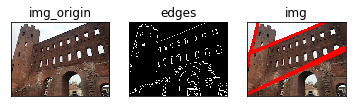

[[ 74  52 200   1]
 [116 130 149 114]
 [  1 108  21  30]
 [  2 185  76 151]]
nu of lines: 4


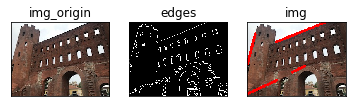

In [40]:
img = cv2.imread('aa.jpg')
img_origin = img.copy()
img2 = img.copy()

house = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 获取灰度图
blur = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(blur, 50, 200)

lines = cv2.HoughLines(edges, 1, np.pi/180, 60)  # 霍夫变换返回的就是极坐标系中的两个参数  rho和theta
# print(np.shape(lines))
lines = lines[:, 0, :]  # 将数据转换到二维
print(lines)
print("nu of lines:", lines.shape[0])
for rho, theta in lines:
    a = np.cos(theta)
    b = np.sin(theta)
    # 从图b中可以看出x0 = rho x cos(theta)
    #               y0 = rho x sin(theta)
    x0 = a*rho
    y0 = b*rho
    # 由参数空间向实际坐标点转换
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*a)
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*a)
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 5)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_origin = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)
plt.subplot(131),plt.imshow(img_origin)
plt.title("img_origin")
plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(edges, cmap="gray")
plt.title("edges")
plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(img)
plt.title("img")
plt.xticks([]),plt.yticks([])
plt.show()

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 60, minLineLength=0, maxLineGap=10)
# print(lines)
lines = lines.reshape(-1, 4)
print(lines)
print("nu of lines:", lines.shape[0])
for x1, y1, x2, y2 in lines:  
    cv2.line(img2, (x1, y1), (x2, y2), (0, 0, 255), 5)

img = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.subplot(131),plt.imshow(img_origin)
plt.title("img_origin")
plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(edges, cmap="gray")
plt.title("edges")
plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(img)
plt.title("img")
plt.xticks([]),plt.yticks([])
plt.show()